<a href="https://colab.research.google.com/github/sumitha9020/Elevatelabs_Tasks/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
K=3 -> Accuracy: 0.9333
K=5 -> Accuracy: 0.9333
K=7 -> Accuracy: 0.9667
K=9 -> Accuracy: 0.9667
K=11 -> Accuracy: 0.9667


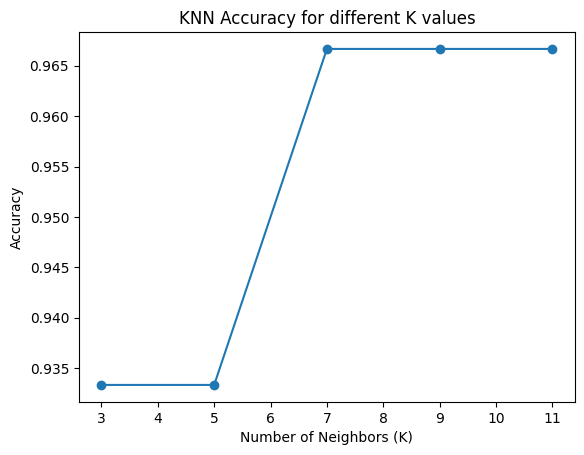

Best K: 7
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



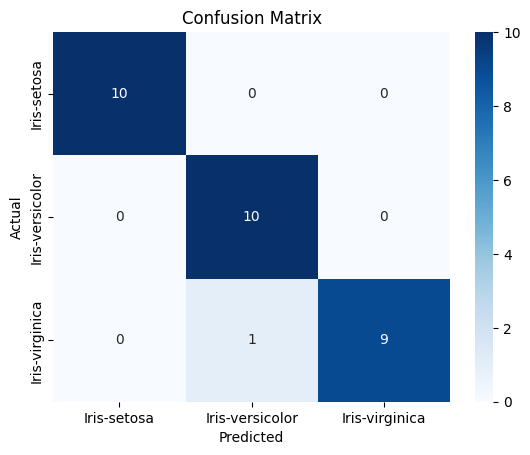

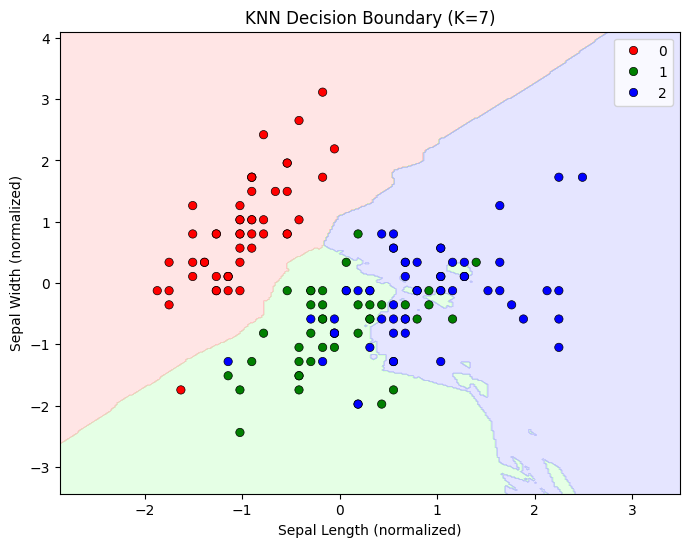

In [5]:
# Task 6: K-Nearest Neighbors (KNN) Classification on Iris Dataset

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
df = pd.read_csv("/content/Iris.csv")
print(df.head())

# Drop Id column if present
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

# Features and labels
X = df.drop("Species", axis=1)
y = df["Species"]

# 2. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train and evaluate KNN with different values of k
k_values = [3, 5, 7, 9, 11]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

# Plot accuracy vs K
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different K values")
plt.show()

# 5. Final Model with best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=knn_final.classes_,
            yticklabels=knn_final.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 6. Decision Boundary Visualization (using 2 features: SepalLengthCm, SepalWidthCm)
from matplotlib.colors import ListedColormap

X_2D = df[["SepalLengthCm", "SepalWidthCm"]].values
y_2D = y.values

# Encode the species labels to numerical values
le = LabelEncoder()
y_2D_encoded = le.fit_transform(y_2D)


# Normalize 2D features
scaler = StandardScaler()
X_2D = scaler.fit_transform(X_2D)

X_train2D, X_test2D, y_train2D_encoded, y_test2D_encoded = train_test_split(X_2D, y_2D_encoded, test_size=0.2, random_state=42, stratify=y_2D_encoded)

knn_2D = KNeighborsClassifier(n_neighbors=best_k)
knn_2D.fit(X_train2D, y_train2D_encoded)

# Meshgrid
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y_2D_encoded, palette=cmap_bold, edgecolor='k')
plt.xlabel("Sepal Length (normalized)")
plt.ylabel("Sepal Width (normalized)")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()